In [51]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
d = pd.read_csv('~/OneDrive/Personal/School/Master\'s/DATA 512/Project/Oct16/Oct16 public.csv')
d.shape

(2583, 211)

In [3]:
d[:2]

,Unnamed: 0,psraid,sample,int_date,fcall,attempts,refusal,ilang,cregion,state,...,hh3,ql1,ql1a,qc1,money2,ckinfo,iphoneuse,hphoneuse,cellweight,weight
0,1,50003,Landline,102016,161020,1,No,English,Midwest,Minnesota,...,2,"Yes, have cell phone",NaN,NaN,NaN,NaN,Dual,Dual HH,NaN,2.088235
1,2,50004,Landline,102016,161020,1,No,English,South,Delaware,...,2,"Yes, have cell phone",NaN,NaN,NaN,NaN,Dual,Dual HH,NaN,1.264706


In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
d.iloc[0]

Unnamed: 0                                                    1
psraid                                                    50003
sample                                                 Landline
int_date                                                 102016
fcall                                                    161020
attempts                                                      1
refusal                                                      No
ilang                                                   English
cregion                                                 Midwest
state                                                 Minnesota
density                                                  Lowest
sstate                                                Minnesota
form                                                     Form 1
stimes                                                        1
igender                                                  Female
irace                                   

In [6]:
d['racethn'].value_counts(dropna=False)

White, non-Hisp    1793
Hispanic            325
Black, non-Hisp     237
Other               186
NaN                  42
Name: racethn, dtype: int64

In [7]:
d['race3m1'].value_counts(dropna=False)

White (e.g., Caucasian, European, Irish, Italian, Arab, Middle Eastern)                                     1998
Black or African-American (e.g., Negro, Kenyan, Nigerian, Haitian)                                           266
Hispanic/Latino (VOL.) (e.g., Mexican, Puerto Rican, Cuban)                                                  128
Asian or Asian-American (e.g., Asian Indian, Chinese, Filipino, Vietnamese or other Asian origin groups)      85
Native American/American Indian/Alaska Native (VOL.)                                                          40
Refused (e.g., non-race answers like American, Human, purple) (VOL.)                                          36
Don't know (VOL.)                                                                                             22
Some other race (SPECIFY____ IF NEEDED: What race or races is that?)                                           5
Pacific Islander/Native Hawaiian (VOL.)                                                         

In [8]:
d['race3m2'].value_counts(dropna=False)

NaN                                                                                                         2506
Native American/American Indian/Alaska Native (VOL.)                                                          44
Black or African-American (e.g., Negro, Kenyan, Nigerian, Haitian)                                            18
White (e.g., Caucasian, European, Irish, Italian, Arab, Middle Eastern)                                        8
Asian or Asian-American (e.g., Asian Indian, Chinese, Filipino, Vietnamese or other Asian origin groups)       5
Pacific Islander/Native Hawaiian (VOL.)                                                                        2
Name: race3m2, dtype: int64

In [9]:
d['race3m3'].value_counts(dropna=False)

NaN                                                                                                         2578
Asian or Asian-American (e.g., Asian Indian, Chinese, Filipino, Vietnamese or other Asian origin groups)       4
White (e.g., Caucasian, European, Irish, Italian, Arab, Middle Eastern)                                        1
Name: race3m3, dtype: int64

In [10]:
d['race3m4'].value_counts(dropna=False)

NaN    2583
Name: race3m4, dtype: int64

Here's the text from the readme.txt:

    *The combined race variable (racecmb) was computed using the following syntax:
    recode race_1 (1=1) (2=2) (3=3) (4 thru 7=5) (8 thru 9=9) into racecmb.
    if race_2>0 and race_2 <8 racecmb=4.
    variable label racecmb "Combining Race".
    value label racecmb
    1 "White"
    2 "Black or African-American"
    3 "Asian or Asian-American"
    4 "Mixed Race"
    5 "Or some other race"
    9 "Dont know/Refused (VOL.)".

In [11]:
#from collections import defaultdict
racethn_to_index = {
    "White (e.g., Caucasian, European, Irish, Italian, Arab, Middle Eastern)": 1,
    "Black or African-American (e.g., Negro, Kenyan, Nigerian, Haitian)": 2,
    "Asian or Asian-American (e.g., Asian Indian, Chinese, Filipino, Vietnamese or other Asian origin groups)": 3,
    "Some other race (SPECIFY____ IF NEEDED: What race or races is that?)": 4,
    "Native American/American Indian/Alaska Native (VOL.)": 5,
    "Pacific Islander/Native Hawaiian (VOL.)": 6,
    "Hispanic/Latino (VOL.) (e.g., Mexican, Puerto Rican, Cuban)": 7,
    "Don't know (VOL.)": 8,
    "Refused (e.g., non-race answers like American, Human, purple) (VOL.)": 9
}


In [12]:
d['race3m1'].map(racethn_to_index).value_counts(dropna=False)

1    1998
2     266
7     128
3      85
5      40
9      36
8      22
4       5
6       3
Name: race3m1, dtype: int64

In [13]:
d['race3m1'].value_counts(dropna=False)

White (e.g., Caucasian, European, Irish, Italian, Arab, Middle Eastern)                                     1998
Black or African-American (e.g., Negro, Kenyan, Nigerian, Haitian)                                           266
Hispanic/Latino (VOL.) (e.g., Mexican, Puerto Rican, Cuban)                                                  128
Asian or Asian-American (e.g., Asian Indian, Chinese, Filipino, Vietnamese or other Asian origin groups)      85
Native American/American Indian/Alaska Native (VOL.)                                                          40
Refused (e.g., non-race answers like American, Human, purple) (VOL.)                                          36
Don't know (VOL.)                                                                                             22
Some other race (SPECIFY____ IF NEEDED: What race or races is that?)                                           5
Pacific Islander/Native Hawaiian (VOL.)                                                         

In [14]:
d['race3m1_index'] = d['race3m1'].map(racethn_to_index)
d['race3m2_index'] = d['race3m2'].map(racethn_to_index)

In [15]:
def get_racecmb(row):
    if ((row['race3m2_index'] > 0) & (row['race3m2_index'] < 8)):
        return 'Mixed Race'
    elif (row['race3m1_index'] == 1):
        return 'White'
    elif (row['race3m1_index'] == 2):
        return 'Black or African-American'
    elif (row['race3m1_index'] == 3):
        return 'Asian or Asian-American'
    elif (row['race3m1_index'] >= 4 & row['race3m1_index'] <= 7):
        return 'Or some other race'
    elif ((row['race3m1_index'] >= 8) & (row['race3m1_index'] <= 9)):
        return 'Dont know/Refused (VOL.)'

In [16]:
d.apply(get_racecmb, axis=1).value_counts(dropna=False)

White                        1935
Black or African-American     258
Or some other race            230
Asian or Asian-American        83
Mixed Race                     77
dtype: int64

In [17]:
d['racecmb'] = d.apply(get_racecmb, axis=1)

**TODO** sanity check above numbers... are they right?

In [18]:
d['racecmb'].value_counts(dropna=False)

White                        1935
Black or African-American     258
Or some other race            230
Asian or Asian-American        83
Mixed Race                     77
Name: racecmb, dtype: int64

## Filter to a smaller list of fields, for ease of examination

In [19]:
fields_to_keep = [
    'psraid',
    'int_date',
    'cregion',
    'state',
    'density',
    'usr',
    'q10',
    'q10a',
    'q10horse',
    'q10horseGP',
    'plan1',
    'early1',
    'plan2',
    'sex',
    'age',
    'gen5',
    'educ2',
    'income',
    'regfinal',
    'cellweight',
    'weight',
    'racecmb'
]

In [20]:
d = d[fields_to_keep]
d.shape

(2583, 22)

In [21]:
dont_include_fields = ['psraid','cellweight','weight']
fields_for_value_counts = [field for field in d.columns if field not in dont_include_fields]
fields_for_value_counts

['int_date',
 'cregion',
 'state',
 'density',
 'usr',
 'q10',
 'q10a',
 'q10horse',
 'q10horseGP',
 'plan1',
 'early1',
 'plan2',
 'sex',
 'age',
 'gen5',
 'educ2',
 'income',
 'regfinal',
 'racecmb']

In [22]:
for field in fields_for_value_counts:
    print(field)
    print(d[field].value_counts(dropna=False))
    print()

int_date
102116    610
102516    520
102216    432
102316    409
102416    326
102016    286
Name: int_date, dtype: int64

cregion
South        988
West         574
Midwest      559
Northeast    462
Name: cregion, dtype: int64

state
California              259
Texas                   202
New York                173
Florida                 162
Pennsylvania             99
Ohio                     96
Illinois                 88
North Carolina           86
New Jersey               84
Virginia                 80
Michigan                 79
Georgia                  79
Wisconsin                63
Minnesota                63
Arizona                  62
Washington               60
Tennessee                53
Missouri                 50
Colorado                 46
Indiana                  45
Maryland                 45
Kentucky                 44
South Carolina           44
Oregon                   42
Oklahoma                 38
Louisiana                38
Alabama                  37
Massachuse

# Weighting investigation

From the "Oct16 methodology.pdf" file (emphasis added):

- "The first stage of weighting corrected for different probabilities of selection associated with the number of adults in each household and each respondent’s telephone usage patterns.1 This weighting also adjusts for the overlapping landline and cell sample frames and the relative sizes of each frame and each sample."
- "The second stage of weighting balances sample demographics to population parameters. The sample is balanced by form to match national population parameters for **sex, age, education, race, Hispanic origin, region (U.S. Census definitions), population density, and telephone usage**. The Hispanic origin was split out based on nativity; U.S. born and non-U.S. born. The White, non-Hispanic subgroup was also balanced on age, education and region. The basic weighting parameters came from the U.S. Census Bureau’s 2014 American Community Survey (ACS) data. The population density parameter was derived from Census 2010 data. The telephone usage parameter came from an analysis of the July-December 2015 National Health Interview Survey."

In [23]:
d[d['state'] == 'Montana']

,psraid,int_date,cregion,state,density,usr,q10,q10a,q10horse,q10horseGP,...,plan2,sex,age,gen5,educ2,income,regfinal,cellweight,weight,racecmb
328,75012,102016,West,Montana,Lowest,Rural,for the Republican ticket of Donald Trump and ...,NaN,Trump/lean Trump,Trump/lean Trump,...,NaN,Female,64,Boomer (1946-64),High school graduate (Grade 12 with diploma or...,"30 to under $40,000",Registered/Plan to/N.Dakota,3.243243,3.117647,White


**TODO**

## Question 10, and filtering to only Clinton or Trump

In [30]:
d['q10'].value_counts(dropna=False)

for the Democratic ticket of Hillary Clinton and Tim Kaine                 944
for the Republican ticket of Donald Trump and Mike Pence                   816
NaN                                                                        463
for the Libertarian Party ticket headed by Gary Johnson [OR]               108
[VOL. DO NOT READ] Don't know                                               90
[VOL. DO NOT READ] Refused                                                  56
[VOL. DO NOT READ] Other candidate                                          55
for the Green Party ticket headed by Jill Stein [PRONOUNCED: St-eye-n]      51
Name: q10, dtype: int64

In [31]:
d['q10a'].value_counts(dropna=False)

NaN                                   2382
[VOL. DO NOT READ] Don't know           47
Donald Trump, the Republican            42
[VOL. DO NOT READ] Refused              31
[VOL. DO NOT READ] Other candidate      31
Hillary Clinton, the Democrat           28
Gary Johnson, the Libertarian [OR]      16
Jill Stein of the Green Party            6
Name: q10a, dtype: int64

In [32]:
d['q10horse'].value_counts(dropna=False)

Clinton/lean Clinton     972
Trump/lean Trump         858
NaN                      463
Johnson/lean Johnson     124
DK-refused to lean        76
Stein/lean Stein          57
Other-refused to lean     33
Name: q10horse, dtype: int64

In [33]:
d['q10horseGP'].value_counts(dropna=False)

Clinton/lean Clinton     972
Trump/lean Trump         858
Not registered           466
Johnson/lean Johnson     124
DK-refused to lean        76
Stein/lean Stein          57
Other-refused to lean     30
Name: q10horseGP, dtype: int64

In [35]:
d_only = d[(d['q10horseGP'] == 'Clinton/lean Clinton') | 
           (d['q10horseGP'] == 'Trump/lean Trump')]
d_only.shape

(1830, 22)

In [36]:
d_only['q10horseGP'].value_counts(dropna=False)

Clinton/lean Clinton    972
Trump/lean Trump        858
Name: q10horseGP, dtype: int64

# CPS sanity check and basic analysis

In [24]:
d_cps = pd.read_csv('~/OneDrive/Personal/School/Master\'s/DATA 512/Project/cps_00001.csv')
d_cps.shape

(185487, 18)

In [25]:
d_cps[:3]

,Unnamed: 0,YEAR,SERIAL,HWTSUPP,CPSID,REGION,STATEFIP,STATECENSUS,ASECFLAG,MONTH,PERNUM,CPSIDP,WTSUPP,AGE,SEX,RACE,HISPAN,EDUC99
0,1,2016,2,1132.05,2.014120e+13,New England Division,Maine,Maine,ASEC,March,1,20141202933701,1132.05,79,Female,White,Not Hispanic,5th-8th grade
1,2,2016,7,1077.54,2.015120e+13,New England Division,Maine,Maine,ASEC,March,1,20151202935901,1077.54,60,Female,White,Not Hispanic,10th grade
2,3,2016,7,1077.54,2.015120e+13,New England Division,Maine,Maine,ASEC,March,2,20151202935902,1077.54,59,Male,White,Not Hispanic,"Some college, no degree"


In [26]:
d_cps.groupby(['RACE'])['WTSUPP'].sum().sort_values(ascending=False)

RACE
White                                                    2.458050e+08
Black/Negro                                              4.170345e+07
Asian only                                               1.824928e+07
American Indian/Aleut/Eskimo                             4.299843e+06
White-Black                                              2.769582e+06
White-American Indian                                    2.145419e+06
White-Asian                                              1.374479e+06
Hawaiian/Pacific Islander only                           1.160598e+06
Black-American Indian                                    3.139107e+05
White-Black-American Indian                              2.836355e+05
White-Hawaiian/Pacific Islander                          2.755069e+05
Asian-Hawaiian/Pacific Islander                          1.016896e+05
Black-Asian                                              9.687077e+04
White-Black-Asian                                        6.684736e+04
White-Asian-Haw

In [27]:
2.458e8

245800000.0

In [28]:
4.17e7

41700000.0

The page at https://en.wikipedia.org/wiki/Demography_of_the_United_States#Race_and_ethnicity says that there were 233k people that are white as of 2015, so the 246k number seems at least in the ballpark. The same page says 40k for black, which also matches up w/ the 42k above. 

# Experiment with PyMC3

In [46]:
import pymc3 as pm

In [55]:
y_obs_categorical = pd.Categorical(d_only['q10horseGP'])
y_obs = y_obs_categorical.codes

In [57]:
sum(y_obs == 0), sum(y_obs == 1)

(972, 858)

In [58]:
d_only['q10horseGP'].value_counts(dropna=False)

Clinton/lean Clinton    972
Trump/lean Trump        858
Name: q10horseGP, dtype: int64

In [59]:
y_obs_categorical

[Trump/lean Trump, Clinton/lean Clinton, Trump/lean Trump, Trump/lean Trump, Clinton/lean Clinton, ..., Trump/lean Trump, Clinton/lean Clinton, Clinton/lean Clinton, Clinton/lean Clinton, Clinton/lean Clinton]
Length: 1830
Categories (2, object): [Clinton/lean Clinton, Trump/lean Trump]

Clinton is 0, Trump is 1.

In [62]:
sex_categorical = pd.Categorical(d_only['sex'])
sex_categorical

[Male, Female, Male, Male, Female, ..., Female, Female, Female, Male, Female]
Length: 1830
Categories (2, object): [Female, Male]

In [64]:
sum(sex_categorical.codes == 0), sum(sex_categorical.codes == 1)

(888, 942)

In [63]:
d_only['sex'].value_counts(dropna=False)

Male      942
Female    888
Name: sex, dtype: int64

Female is 0, Male is 1.

In [99]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    
    mu = alpha + beta * sex_categorical.codes
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    
    y = pm.Bernoulli('yl', theta, observed=y_obs)

In [100]:
with model:
    trace = pm.sample(1000, n_init=50000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:04<00:00, 475.96it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127d32f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127e57320>]], dtype=object)

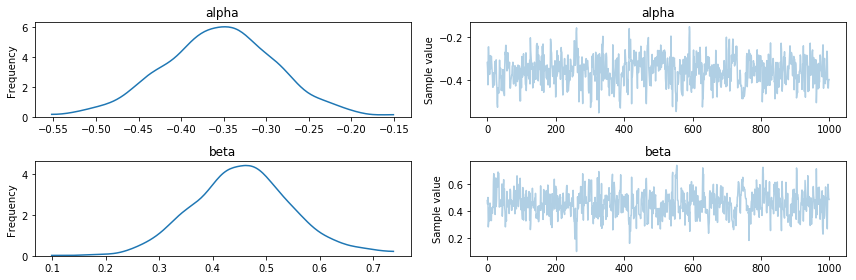

In [101]:
pm.traceplot(trace, ['alpha','beta'])

In [102]:
pm.df_summary(trace, ['alpha','beta'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-0.355992,0.066024,0.003302,-0.482270,-0.220841
beta,0.455265,0.093018,0.004806,0.276677,0.649368


In [103]:
def classify(n, threshold, trace_data):
    n = np.array(n)
    mu = trace_data['alpha'].mean() + trace_data['beta'].mean() * n
    prob = 1 / (1 + np.exp(-mu))
    return prob, prob > threshold

So, we pass in an array with 0 and 1, which means we want to see what the model will predict for Clinton/Trump given just the gender of the voter. As noted above, 0 is Female and 1 is Male, and 0 is Clinton, 1 is Trump.

In [104]:
classify([0,1], 0.5, trace)

(array([ 0.41193024,  0.52479794]), array([False,  True], dtype=bool))

So, I think - if I'm not too tired and haven't made any obtuse or obvious mistakes - this means that a female (the 0 in the array we pass in) has a probability of 0.41 of voting for Trump, and with a threshold - also passed in - of 0.5, she votes for Clinton. A male (1) has a probability of 0.52 of voting for Trump, and with the same threshold he does vote for Trunp.

What's the crosstab - should, perhaps, the proportions match?

In [105]:
pd.crosstab(d_only['sex'], d_only['q10horseGP'], margins=True)

q10horseGP,Clinton/lean Clinton,Trump/lean Trump,All
sex,,,
Female,523,365,888
Male,449,493,942
All,972,858,1830


In [106]:
pd.crosstab(d_only['sex'], d_only['q10horseGP'], normalize='index')

q10horseGP,Clinton/lean Clinton,Trump/lean Trump
sex,,
Female,0.588964,0.411036
Male,0.476645,0.523355


And... I think this confirms that the Bayesian implementation worked!? See the column for Trump - 0.4110 for Female, which matches the output above, and 0.5233 for Male, which also matches.

What about with sklearn?

In [107]:
from sklearn.linear_model import LogisticRegression

In [84]:
# X always needs to be a 2-d array, so reshape does this
# (for syntax, try calling without the reshape and see the error)
lr = LogisticRegression().fit(sex_categorical.codes.reshape(-1, 1), y_obs)

In [87]:
lr.predict(np.array([0, 1]).reshape(-1,1))

array([0, 1], dtype=int8)

So, Female has a prediction of Clinton, and Male a prediction of Trump, like we saw before.

What about the probabilities?

In [92]:
lr.predict_proba(np.array([0, 1]).reshape(-1,1))

array([[ 0.58805886,  0.41194114],
       [ 0.47712052,  0.52287948]])

Per http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba, predict_proba gives a row for each row in the input data. Since we pass in 0 and 1, we get a row for 0 (Female) and a row for 1 (Male). The first column is the probability of 0 (Clinton) and the second column is the probability of 1 (Trump). The Bayesian model is predicting the probability of Trump, so we'd expect to see the second column match... and it DOES! Ok. That's awesome, on the first try.

## Add in another variable

In [95]:
racecmb_categorical = pd.Categorical(d_only['racecmb'])
racecmb_categorical

[White, White, White, White, White, ..., White, White, White, White, Or some other race]
Length: 1830
Categories (5, object): [Asian or Asian-American, Black or African-American, Mixed Race, Or some other race, White]

In [123]:
len(np.unique(racecmb_categorical.codes))

5

In [124]:
with pm.Model() as model_with_racecmb:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_sex = pm.Normal('beta_sex', mu=0, sd=10)
    beta_racecmb = pm.Normal('beta_racecmb', mu=0, sd=10, 
                             shape=len(np.unique(racecmb_categorical.codes)))
    
    mu = alpha + \
         beta_sex * sex_categorical.codes + \
         beta_racecmb[racecmb_categorical.codes] * sex_categorical.codes
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    
    y = pm.Bernoulli('y', theta, observed=y_obs)

In [125]:
with model_with_racecmb:
    trace_with_racecmb = pm.sample(1000, n_init=50000, tune=1000)
    #trace_with_racecmb = pm.sample(1000, n_init=50000, tune=1000)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [01:40<00:00, 19.82it/s]


In [126]:
varnames_with_racecmb = ['alpha','beta_sex','beta_racecmb']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e662c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1325c1ef0>]], dtype=object)

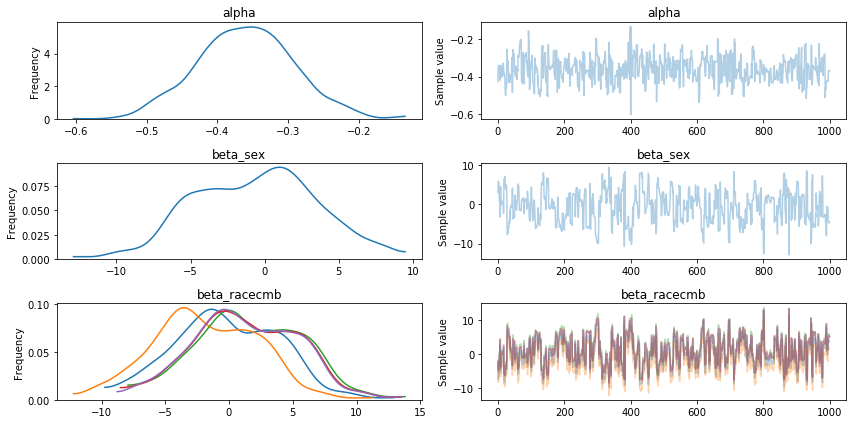

In [127]:
pm.traceplot(trace_with_racecmb, varnames_with_racecmb)

In [128]:
pm.df_summary(trace_with_racecmb, varnames_with_racecmb)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-0.360262,0.067090,0.003299,-0.486927,-0.227217
beta_sex,-0.618728,4.062501,0.270953,-6.951137,8.023335
beta_racecmb__0,-0.141537,4.089663,0.272236,-8.422962,6.569237
beta_racecmb__1,-1.839844,4.059838,0.267968,-10.201952,5.085870
beta_racecmb__2,1.622476,4.089696,0.272453,-7.369271,7.890097
beta_racecmb__3,1.274545,4.063646,0.271575,-7.470081,7.663031
beta_racecmb__4,1.266244,4.056369,0.270869,-7.392074,7.651114


In [140]:
sex_categorical

[Male, Female, Male, Male, Female, ..., Female, Female, Female, Male, Female]
Length: 1830
Categories (2, object): [Female, Male]

In [129]:
racecmb_categorical

[White, White, White, White, White, ..., White, White, White, White, Or some other race]
Length: 1830
Categories (5, object): [Asian or Asian-American, Black or African-American, Mixed Race, Or some other race, White]

In [130]:
with model_with_racecmb:
    trace_with_racecmb = pm.sample(500, n_init=50000, tune=500)
    #trace_with_racecmb = pm.sample(1000, n_init=50000, tune=1000)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:48<00:00, 16.46it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1329f1cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x132bae2b0>]], dtype=object)

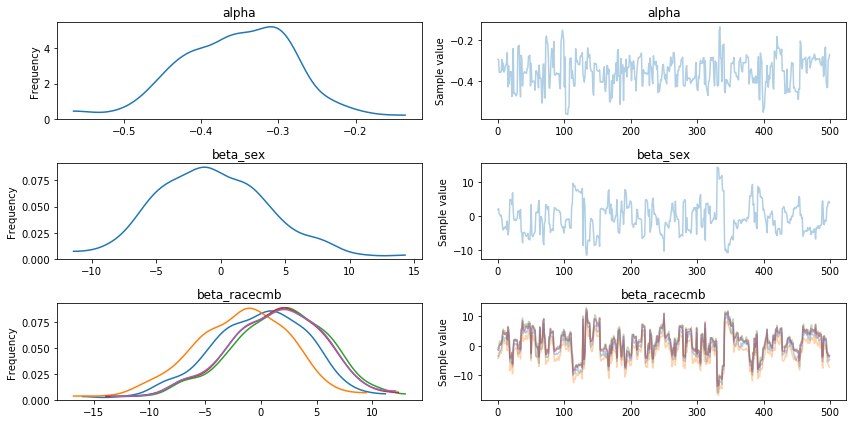

In [131]:
pm.traceplot(trace_with_racecmb, varnames_with_racecmb)

In [132]:
pm.df_summary(trace_with_racecmb, varnames_with_racecmb)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-0.353764,0.072971,0.005060,-0.503764,-0.219328
beta_sex,-0.573645,4.455124,0.372560,-8.693975,8.231394
beta_racecmb__0,-0.208892,4.482532,0.373964,-9.184006,7.677869
beta_racecmb__1,-1.871870,4.479658,0.372446,-10.723462,6.556477
beta_racecmb__2,1.598449,4.472896,0.374165,-7.392703,9.935567
beta_racecmb__3,1.213370,4.457354,0.372660,-7.550354,9.302019
beta_racecmb__4,1.216465,4.452707,0.371975,-7.417473,9.464863


In [142]:
trace_with_racecmb['beta_sex'].mean()

-0.57364481444136439

In [159]:
def standard_logistic(x):
    return 1 / (1 + np.exp(-x))

def classify_with_racecmb(n, threshold, trace_data, varnames):
    n = np.array(n)
    
    mean_vals = pm.df_summary(trace_data, varnames)['mean'].values

    mu = np.dot(n, mean_vals)

    prob = standard_logistic(mu)
    return prob, prob > threshold

In [160]:
a = np.array([1,0,1,0,0,0,0,
              1,1,1,0,0,0,0,
              1,0,0,1,0,0,0,
              1,1,0,1,0,0,0,
              1,0,0,0,1,0,0,              
              1,1,0,0,1,0,0,
              1,0,0,0,0,1,0,
              1,1,0,0,0,1,0,
              1,0,0,0,0,0,1,              
              1,1,0,0,0,0,1,]).reshape(10,-1)
a

array([[1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 1]])

In [161]:
classify_with_racecmb(a, 0.5, trace_with_racecmb, varnames_with_racecmb)

(array([ 0.36293326,  0.24300029,  0.09747205,  0.05736316,  0.7763785 ,
         0.6617361 ,  0.70257833,  0.57100708,  0.70322481,  0.57176523]),
 array([False, False, False, False,  True,  True,  True,  True,  True,  True], dtype=bool))

First off, is the classify function correctly doing the math? If we do it manually, do we get the same results? Looks like yes.

In [165]:
# [1, 0, 1, 0, 0, 0, 0]
standard_logistic(-0.353764 + -0.208892)

0.3629331355711774

In [166]:
# [1, 1, 1, 0, 0, 0, 0]
standard_logistic(-0.353764 + -0.573645 + -0.208892)

0.24300014901816597

In [167]:
# [1, 1, 0, 0, 0, 1, 0]
standard_logistic(-0.353764 + -0.573645 + 1.213370)

0.57100703258022611

Still, it seems odd that the coefficient for sex is now negative... i.e., that being a male (1) makes you much more likely to vote for Trump. This is opposite of what I'd have thought, and of what we found in the model previously. It could be because after controlling for race this is what we see - and the model and data are right - or that I've messed up something else.

What do I see if I try it w/ sklearn?

First, I'll use get_dummies to get a matrix - I could instead compose it myself using categoricals and .codes, etc. or w/ custom code, but this seems easiest since it's already written. 

On the same note, I might want to do this way up at the top and use the result instead of the categoricals i've already used above.

Finally, at least for now to match the structure I already have, I want a single column for sex - so can use true for the drop_first arg - and one column per feature for race - and so will use the default false for drop first. I can't do these at the same time, so I'll do them in two separate calls and concatenate the results.

In [176]:
d_only_dummies = pd.concat([pd.get_dummies(d_only['sex'], drop_first=True),
                            pd.get_dummies(d_only['racecmb'])], axis=1)
d_only_dummies.shape

(1830, 6)

In [177]:
d_only_dummies[:2]

,Male,Asian or Asian-American,Black or African-American,Mixed Race,Or some other race,White
0,1,0,0,0,0,1
1,0,0,0,0,0,1


In [178]:
lr = LogisticRegression().fit(d_only_dummies.values, y_obs)

In [189]:
lr.predict(a[:,1:]) # use slices/indexing to get rid of the first col w/ 1s for the alpha intercept

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int8)

In [190]:
lr.predict_proba(a[:,1:])

array([[ 0.82390962,  0.17609038],
       [ 0.74815752,  0.25184248],
       [ 0.96154435,  0.03845565],
       [ 0.94074273,  0.05925727],
       [ 0.5458355 ,  0.4541645 ],
       [ 0.43280998,  0.56719002],
       [ 0.63804806,  0.36195194],
       [ 0.52813236,  0.47186764],
       [ 0.53230074,  0.46769926],
       [ 0.4194892 ,  0.5805108 ]])

Again, the above is a row per input, with the first col showing the probability of Clinton and the second the probability of Trump. So, the second column should roughly match the Bayesian model's output, I think (like it did previously).

In [191]:
lr.coef_

array([[ 0.45425376, -0.60268981, -2.27866138,  0.75651549,  0.37347149,
         0.81099053]])

In [192]:
lr.intercept_

array([-0.94037367])

So, the intercept's definitely different. The beta values are too. The first value, which is on when the voter is male, is 0.45, which is positive (like we'd expect) and - fwiw, I don't think I would always expect this to be the case, because I think adding other predictors could change it - also is the same as it was w/ the original model.

The race coefficients are negative for Asians, very negative for African Americans, and positive for mixed race, other, and, most so, for white.

So, the sklearn model makes sense. The Bayesian model doesn't, and it doesn't match the sklearn model.

## Another try w/ race, this time with the data from get_dummies

In [197]:
d_only_dummies.values.shape[1]

6

In [198]:
with pm.Model() as model_with_racecmb_2:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=d_only_dummies.values.shape[1])
    
    mu = alpha + pm.math.dot(d_only_dummies.values, beta)
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    
    y = pm.Bernoulli('y', theta, observed=y_obs)

In [199]:
with model_with_racecmb_2:
    trace_with_racecmb_2 = pm.sample(500, n_init=50000, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:59<00:00, 16.91it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13425ce80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13436d4e0>]], dtype=object)

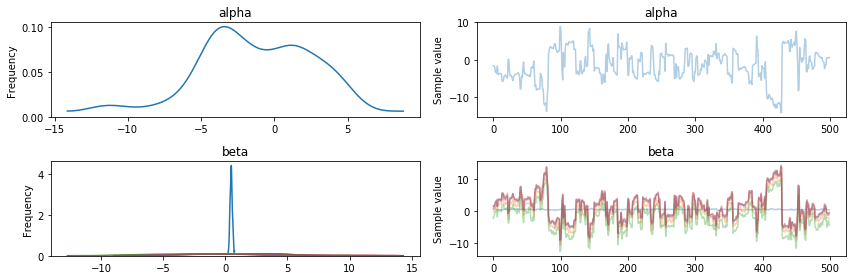

In [200]:
pm.traceplot(trace_with_racecmb_2, ['alpha','beta'])

In [202]:
pm.df_summary(trace_with_racecmb_2, ['alpha', 'beta'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-1.489955,4.179763,0.368689,-11.782032,4.811958
beta__0,0.468029,0.094201,0.006772,0.298105,0.649454
beta__1,-0.225859,4.160714,0.365681,-6.701860,9.936929
beta__2,-2.143692,4.195794,0.368515,-9.179256,7.751277
beta__3,1.367183,4.185021,0.368457,-5.034023,11.743239
beta__4,0.930670,4.180502,0.367910,-5.255457,11.103317
beta__5,1.358082,4.171686,0.367825,-4.927967,11.720552


**TODO** need to tweak classify to use differently specified var names, or pass in the full set of beta__x names?